In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
#plt.rc('axes', facecolor='#FFFFFF')

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
star98_df = sm.datasets.star98.load_pandas().data
X = star98_df[['LOWINC', 'PERMINTE', 'PERHISP']]

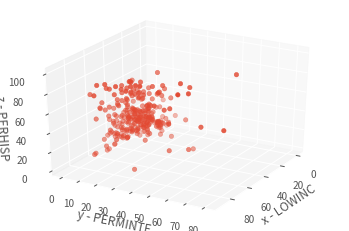

In [4]:
with plt.rc_context({'axes.facecolor': '#FFFFFF'}):

    fig = plt.figure()

    # https://matplotlib.org/mpl_toolkits/mplot3d/api.html#module-mpl_toolkits.mplot3d.axes3d
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('x - LOWINC')
    ax.set_ylabel('y - PERMINTE')
    ax.set_zlabel('z - PERHISP')

    ax.scatter(X.LOWINC, X.PERMINTE, X.PERHISP)

    # view_init(elev=None, azim=None)
    #
    # - ‘elev’ stores the elevation angle in the z plane.
    # - ‘azim’ stores the azimuth angle in the x, y plane.
    #
    # ref: https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init
    ax.view_init(30, 30)

# Principal Component Analysis

Using the matrix factorization: singular value decomposition (SVD).
    
$ \mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{W}^T $

* $ \mathbf{\Sigma} $: n-by-p, the diagonal are singular values $ \sigma_k $.
* $ \mathbf{U} $: n-by-n, the columns are left singular vectors.
* $ \mathbf{W} $: p-by-p, the columns are right singular vectors.

A great visualization: http://setosa.io/ev/principal-component-analysis/ .

## First Trial

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
# fit the model with X, and apply the dimensionality reduction on X
X_pca = pca.fit_transform(X)

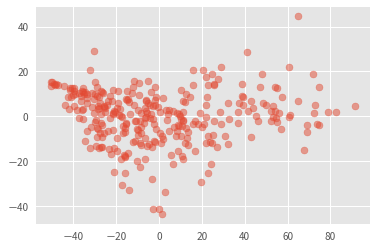

In [8]:
# [:, 0]: all rows and the first column
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.5)

## Who Contributes Most? - `components_`

In [9]:
pca_comp_df = pd.DataFrame(
    data=pca.components_,
    index=['comp_1', 'comp_2'],
    columns=['LOWINC', 'PERMINTE', 'PERHISP']
)
pca_comp_df

,LOWINC,PERMINTE,PERHISP
comp_1,0.579483,0.271801,0.768326
comp_2,-0.813959,0.240290,0.528896


* `components_`: principal axes in feature space, representing the directions of maximum variance in the data.

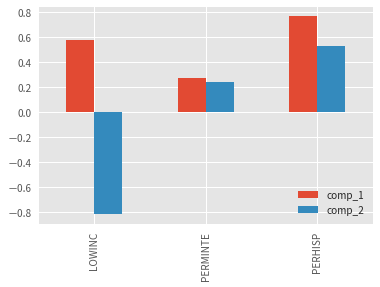

In [10]:
pca_comp_df.T.plot.bar()

In [11]:
# comp_1, comp_2
pca.explained_variance_ratio_

array([ 0.81222025,  0.1184548 ])

## Find the Best N Components Among the 3 Features

In [12]:
n = 3
my_X = X

In [13]:
my_pca_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_pca_score_df

In [14]:
for i in my_pca_score_df.index:
    my_pca = PCA(n_components=i)
    my_pca.fit(my_X)
    my_pca_score_df.loc[i, 'score'] = my_pca.score(my_X)

In [15]:
pca_score_df_3 = my_pca_score_df
pca_score_df_3

,score
1,-12.407732
2,-12.372278
3,-12.372278


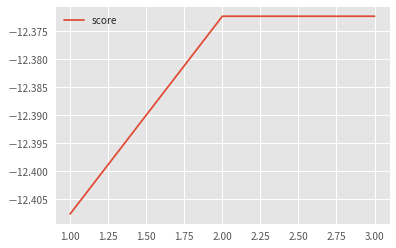

In [16]:
pca_score_df_3.plot()

## Find the Best N Components Among the All Features

In [17]:
n = 14
my_X = star98_df.iloc[:, :14]

In [18]:
my_pca_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_pca_score_df

In [19]:
for i in my_pca_score_df.index:
    my_pca = PCA(n_components=i)
    my_pca.fit(my_X)
    my_pca_score_df.loc[i, 'score'] = my_pca.score(my_X)

In [20]:
pca_score_df_all = my_pca_score_df
pca_score_df_all

,score
1,-84.510798
2,-63.617255
3,-61.814531
4,-60.078136
5,-59.236258
6,-58.594189
7,-57.666167
8,-57.211691
9,-56.784041
10,-56.287644


Text(3,-67.5,'2 comps')

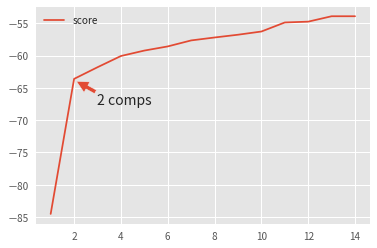

In [21]:
pca_score_df_all.plot()
plt.annotate(
    xy=(2.1, -64),
    arrowprops=dict(facecolor='#E24A33'),
    xytext=(3, -67.5),
    s='2 comps', size=14,
)

## Dig More

* [sklearn.decomposition.PCA – Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
* [Principal component analysis – Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)